# 3.Logistic regression

In [40]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE

In [41]:
# Load the Diabetes dataset (replace with your local file path if necessary)
data = pd.read_csv('diabetes.csv')  # Replace with your dataset path

# Display the first few rows of the dataset to verify
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [42]:
# Shows a tuple with row and column size
data.shape

(2460, 9)

In [43]:
# Print concise summary of DataFrame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [44]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [45]:
# Get the description of the dataset
description = data.describe()
print(description)

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2460.000000  2460.000000    2460.000000    2460.000000  2460.000000   
mean      3.817480   121.602033      68.915041      20.531301    80.119919   
std       3.296458    31.789270      19.082655      15.716901   116.765807   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000   100.000000      64.000000       0.000000     0.000000   
50%       3.000000   117.000000      70.000000      23.000000    36.000000   
75%       6.000000   142.000000      80.000000      33.000000   129.000000   
max      17.000000   197.000000     122.000000      63.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2460.000000               2460.000000  2460.000000  2460.000000  
mean     31.990447                  0.491440    32.821951     0.390244  
std       7.802569                  0.363917    11.251208     0.487904  
min  









## Three Interesting insights from the Dataset

### 1.Distribution of Glucose Levels
Glucose levels play a crucial role in diagnosing diabetes. By plotting the distribution, we can see the spread and concentration of glucose values in the dataset

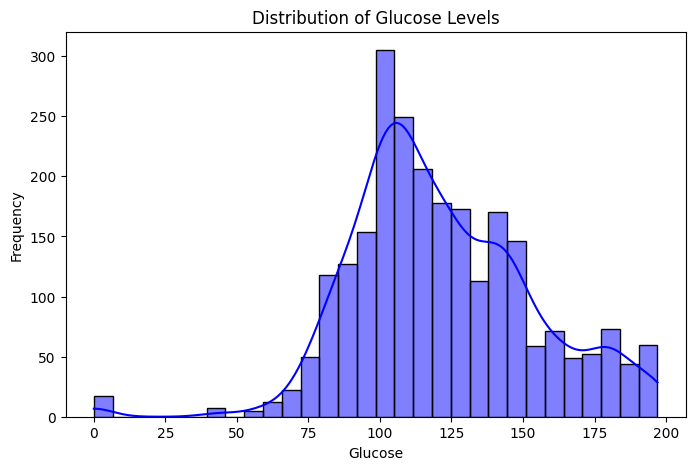

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Glucose"], kde=True, bins=30, color='blue')
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

### 2.Age vs. Diabetes Outcome
Age can be an important factor in diabetes risk.By comparing the age distribution of diabetics  we can check what type of  people are more likely to have diabetes.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_28352\3511276958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Outcome"], y=data["Age"], palette="coolwarm")


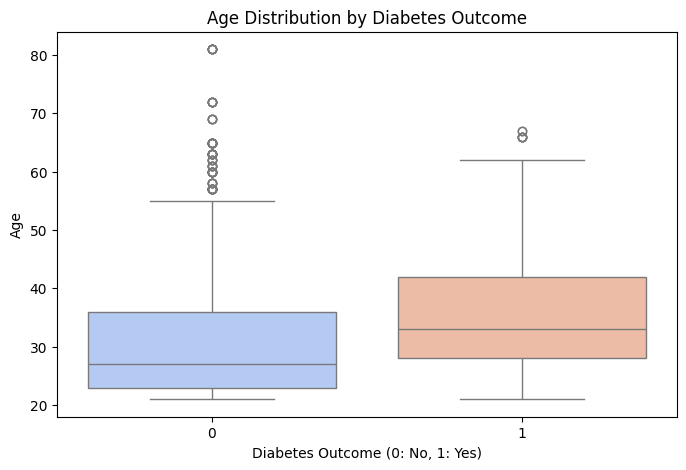

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["Outcome"], y=data["Age"], palette="coolwarm")
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()


### 3.BMI vs. Diabetes Outcome
Body Mass Index (BMI) is an important health indicator, and higher BMI is often linked to an increased risk of diabetes.


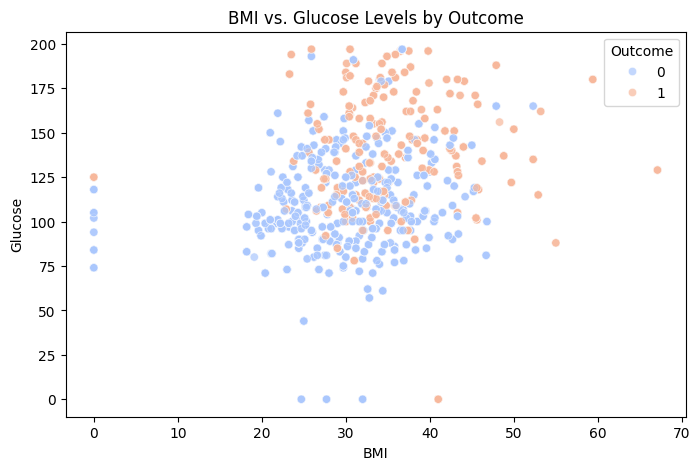

In [48]:
# BMI vs. Glucose Levels by Outcome
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["BMI"], y=data["Glucose"], hue=data["Outcome"], alpha=0.7, palette="coolwarm")
plt.title("BMI vs. Glucose Levels by Outcome")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(title="Outcome")
plt.show()


In [49]:
# Features (X) and target variable (y)
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
          'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Feature columns
y = data['Outcome']  # Target variable (Outcome: 1 for diabetes, 0 for no diabetes)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [50]:
# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
print("\n🔹 Before SMOTE class distribution:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n After SMOTE class distribution:")
print(pd.Series(y_train).value_counts())


🔹 Before SMOTE class distribution:
Outcome
0    1195
1     773
Name: count, dtype: int64

 After SMOTE class distribution:
Outcome
1    1195
0    1195
Name: count, dtype: int64


In [52]:

# Initialize the Logistic Regression model
model = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Get model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")  



Intercept: [-0.1465857]
Coefficients: [[ 0.18791679  1.0075804  -0.06141307  0.04738934 -0.2731164   0.67080278
   0.31280637  0.16799051]]


In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test)


Evaluate the models

In [54]:
# Accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)  
print("Accuracy:", accuracy)

Accuracy: 0.6971544715447154


In [55]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[226  79]
 [ 70 117]]


In [56]:
# Detailed classification report
class_report = classification_report(y_test, y_pred)  
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       305
           1       0.60      0.63      0.61       187

    accuracy                           0.70       492
   macro avg       0.68      0.68      0.68       492
weighted avg       0.70      0.70      0.70       492



AUC-ROC curve to evaluate model performance 

AUC-ROC Score: 0.7869553782764969


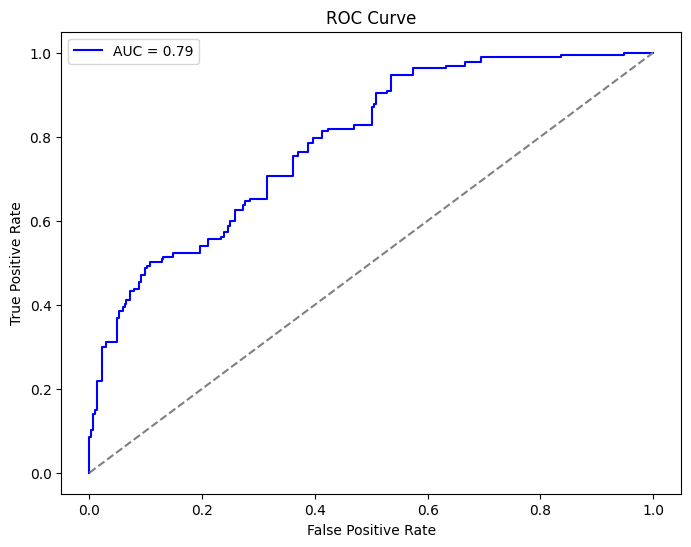

In [57]:
from sklearn.metrics import roc_auc_score

# Get probability scores instead of class predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC-ROC Score:", auc_score)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


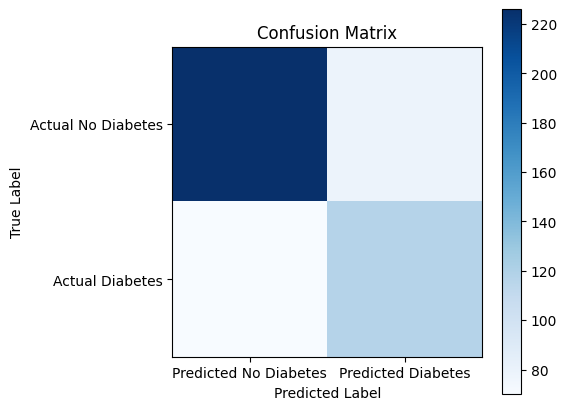

In [58]:
# Visualizing the confusion matrix (optional)
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No Diabetes', 'Predicted Diabetes'])
plt.yticks([0, 1], ['Actual No Diabetes', 'Actual Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


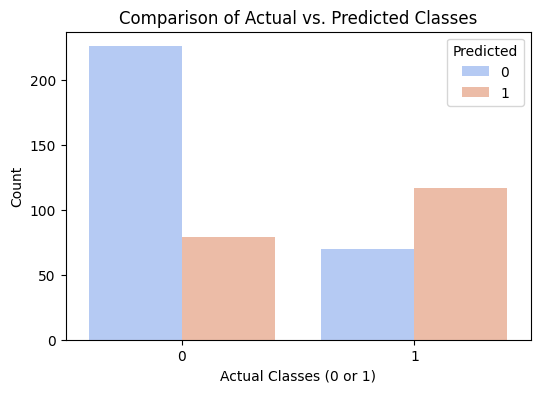

In [59]:
# Create a DataFrame to compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
sns.countplot(x="Actual", hue="Predicted", data=comparison, palette="coolwarm")
plt.xlabel("Actual Classes (0 or 1)")
plt.ylabel("Count")
plt.title("Comparison of Actual vs. Predicted Classes")
plt.legend(title="Predicted")
plt.show()
